In [ ]:
!pip install factor_analyzer;

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [ ]:
import factor_analyzer as fa

In [ ]:
df = pd.read_csv('D:\data\stickleback.csv', sep=';')
df.columns = df.columns.str.lower()
df = df.loc[:,:'bout']
df.head()

,lunges,bites,zigzags,nest,spines,dnest,bout
0,"79,00","25,00","0,0","0,0","15,0","0,00","45,00"
1,"136,00","58,00","6,0","0,0","15,0","0,00","148,00"
2,"115,00","30,00","2,0","1,0","9,0","5,00","29,00"
3,"129,00","139,00","16,0","0,0","22,0","0,00","69,00"
4,"120,00","58,00","15,0","15,0","14,0","82,00","9,00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lunges   54 non-null     object
 1   bites    54 non-null     object
 2   zigzags  54 non-null     object
 3   nest     54 non-null     object
 4   spines   54 non-null     object
 5   dnest    54 non-null     object
 6   bout     54 non-null     object
dtypes: object(7)
memory usage: 3.1+ KB


In [ ]:
for col in df.columns:
    df[col] = df[col].str.replace(',', '.').astype(float)

In [ ]:
df.describe()

,lunges,bites,zigzags,nest,spines,dnest,bout
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


В датасете нет пропущенных значений, оценки распределены от 3 до 9, наибольшей дисперсией обладает поле *total_sulfur_dioxide* (общее содержание диоксида серы)

In [ ]:
df.corr()

,lunges,bites,zigzags,nest,spines,dnest,bout
lunges,1.000000,0.688077,-0.139336,-0.164133,0.055567,-0.228568,0.233314
bites,0.688077,1.000000,-0.042761,-0.148884,0.373382,-0.217563,0.117316
zigzags,-0.139336,-0.042761,1.000000,0.351894,0.067813,0.091315,-0.160693
nest,-0.164133,-0.148884,0.351894,1.000000,-0.052538,0.514028,-0.305876
spines,0.055567,0.373382,0.067813,-0.052538,1.000000,-0.051099,-0.041483
dnest,-0.228568,-0.217563,0.091315,0.514028,-0.051099,1.000000,-0.242177
bout,0.233314,0.117316,-0.160693,-0.305876,-0.041483,-0.242177,1.000000


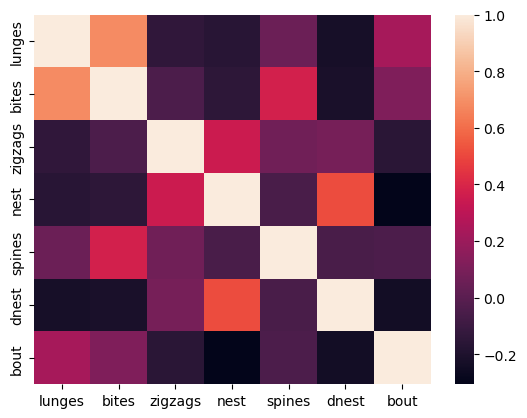

In [ ]:
sns.heatmap(data=df.corr());

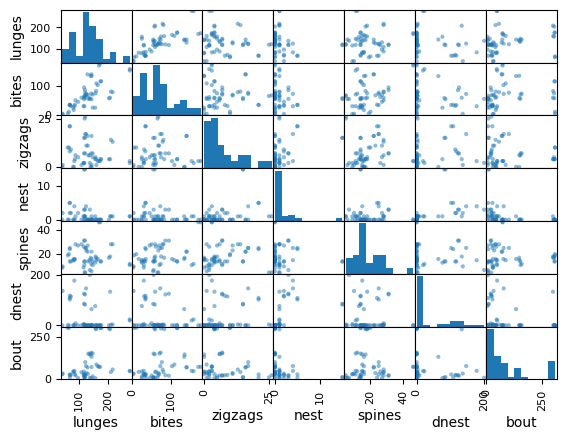

In [ ]:
pd.plotting.scatter_matrix(df)
plt.show()

Распределение погружения, укуса близки к нормальному

Погружение и укус коррелируют

In [ ]:
fa.factor_analyzer.calculate_bartlett_sphericity(df)

(78.65570932525837, 1.3528985212723955e-08)

Корреляционная матрица отличается от единичной, факторый анализ можно проводить

In [ ]:
fa.factor_analyzer.calculate_kmo(df)

(array([0.5045225 , 0.49499775, 0.54613696, 0.5818407 , 0.3460975 ,
        0.62519322, 0.76803628]),
 0.5360904829300582)

Значение меры адекватности > 0.5, значит можно проводить факторный анализ

In [ ]:
scaled_data = scale(df.values)

In [ ]:
pca = PCA(n_components=7)
pca.fit(scaled_data)
pca.explained_variance_

array([2.33131423, 1.48167964, 0.99758804, 0.90279779, 0.76745194,
       0.41244602, 0.2387978 ])

Согласно критерию Кайзера, отбраются факторы с собственными значениям > 1. Значит, будет отобрано 2 фактора

In [ ]:
pca.explained_variance_ratio_

array([0.32687739, 0.20774873, 0.13987346, 0.12658276, 0.1076057 ,
       0.05782973, 0.03348223])

Если взять пороговое значение объяснённой дисперсии 0.1, то будет отобрано 5 факторов, если 0.2, то 2 фактора

Предполагается, что будет отобрано 2-3 фактора

In [ ]:
factor_analyzer = fa.FactorAnalyzer()
factor_analyzer.fit(scaled_data)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
eigenvalues = factor_analyzer.get_eigenvalues()
eigenvalues

(array([2.28814174, 1.45424113, 0.97911419, 0.88607931, 0.75323987,
        0.40480813, 0.23437562]),
 array([ 2.0760796 ,  1.28986187,  0.49059726,  0.10602069,  0.02855961,
        -0.04025658, -0.10823207]))

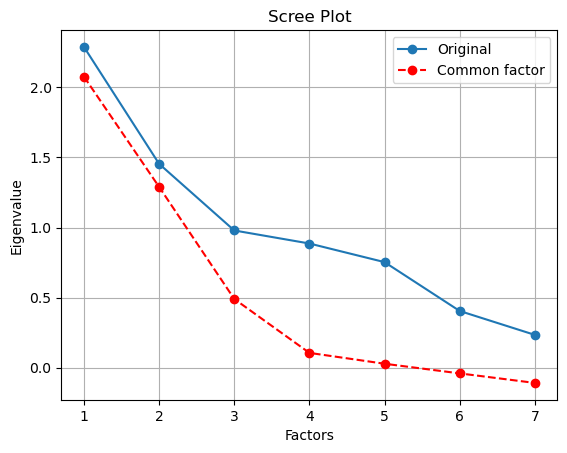

In [ ]:
plt.plot(range(1, scaled_data.shape[1] + 1), eigenvalues[0], 'o-')
plt.plot(range(1, scaled_data.shape[1] + 1), eigenvalues[1], 'ro--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.legend(['Original','Common factor'])
plt.show()

 Будет отобрано 2 фактора

In [ ]:
factor_analyzer.set_params(n_factors=2, rotation='varimax')
factor_analyzer.fit(scaled_data)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
factor_structure = pd.DataFrame(factor_analyzer.loadings_, columns=['factor1', 'factor2'], index=df.columns)
factor_structure

,factor1,factor2
lunges,0.623123,-0.242540
bites,1.007741,-0.128163
zigzags,0.000196,0.355506
nest,-0.015454,0.894196
spines,0.294315,0.018574
dnest,-0.155512,0.536576
bout,0.099458,-0.384636


In [ ]:
factor_analyzer.set_params(n_factors=3, rotation='varimax')
factor_analyzer.fit(scaled_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
factor_structure = pd.DataFrame(factor_analyzer.loadings_, columns=['factor1', 'factor2', 'factor3'], index=df.columns)
factor_structure

,factor1,factor2,factor3
lunges,-0.213815,0.876088,0.022384
bites,-0.110001,0.742419,0.588652
zigzags,0.342123,-0.076383,0.107402
nest,0.989281,0.058242,-0.141253
spines,0.025750,0.057196,0.564226
dnest,0.501341,-0.134760,-0.111540
bout,-0.359746,0.185878,-0.089865


Отберём 2 фактора, назозовём их:
* Погружаемость
* Гнездование

In [ ]:
factor_analyzer.set_params(n_factors=3, rotation='varimax')
factor_analyzer.fit(scaled_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
factor_analyzer.get_communalities()

array([0.81374772, 0.90979693, 0.13441784, 1.00202059, 0.32228549,
       0.28194415, 0.1720437 ])

In [ ]:
factor_analyzer.get_uniquenesses()

array([ 0.18625228,  0.09020307,  0.86558216, -0.00202059,  0.67771451,
        0.71805585,  0.8279563 ])

In [ ]:
factor_structure['proportion_var'] = factor_analyzer.get_communalities()
factor_structure['cumulative_var'] = factor_analyzer.get_communalities()
factor_structure

,factor1,factor2,factor3,proportion_var,cumulative_var
lunges,-0.213815,0.876088,0.022384,0.813748,0.813748
bites,-0.110001,0.742419,0.588652,0.909797,0.909797
zigzags,0.342123,-0.076383,0.107402,0.134418,0.134418
nest,0.989281,0.058242,-0.141253,1.002021,1.002021
spines,0.025750,0.057196,0.564226,0.322285,0.322285
dnest,0.501341,-0.134760,-0.111540,0.281944,0.281944
bout,-0.359746,0.185878,-0.089865,0.172044,0.172044


In [ ]:
factor_structure[['factor1', 'factor2']].corr()

,factor1,factor2
factor1,1.000000,-0.577922
factor2,-0.577922,1.000000
